# Example notebook for using RS propagation from propagate module 

In the following we exemplify Rayleigh-Sommerfeld (RS) propagation from elements via the ``generate`` module illuminated with plane waves, using the ``propagate`` module. In particular:
* Several examples of RS propagations in Z axis, YZ and XY planes:
    * RS propagation from elements defined from library functions apertures (e.g. Fresnel lenses)
    * RS propagation from elements defined from arbitrarily defined functions (e.g. Spiral Phase Plate)

In the ``propagate`` module, Rayleigh-Sommerfeld propagation is implemented via direct numerical integration of a double integral (see, e.g. Goodman Fourier Optics textbook as reference), making it (very) time-consuming, yet exact. 

Fresnel and Fraunhofer propagations provide acceptable approximations with faster computation for the propagation in some ranges. In the ``propagate`` module these approximations have been implemented following the Goodman Fourier Optics textbook. For simple use examples of Fresnel and Fraunhofer propagations check propopt package https://github.com/cunhaJ/propopt .
    

In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli

import pyMOE as moe 
from pyMOE.generate import *  
from pyMOE.propagate import * 

## RS propagation from a circular aperture

<IPython.core.display.Javascript object>


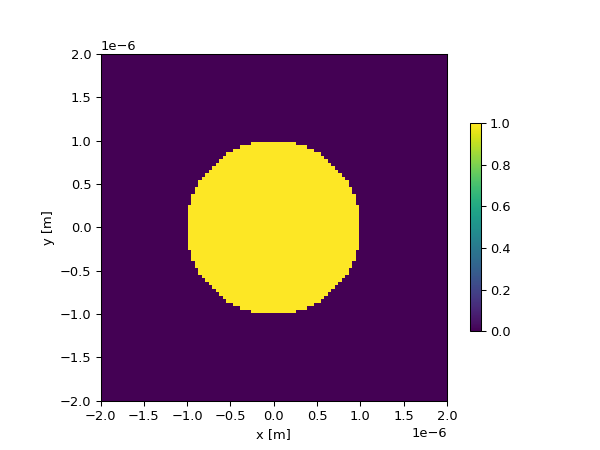

../..\pyMOE\plotting.py:53: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(aperture.x/scale_factor, aperture.y/scale_factor, aperture.aperture,)


<IPython.core.display.Javascript object>


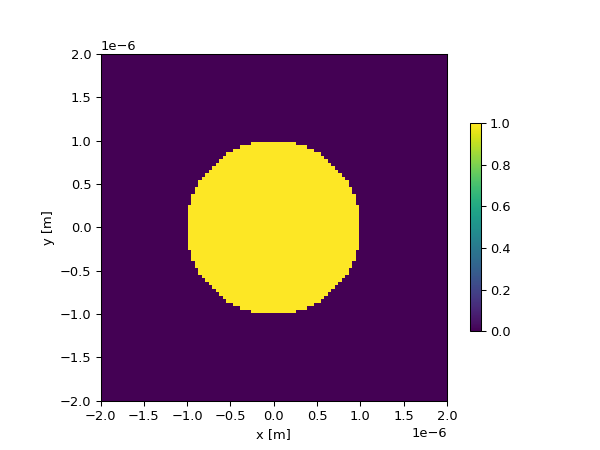

<IPython.core.display.Javascript object>


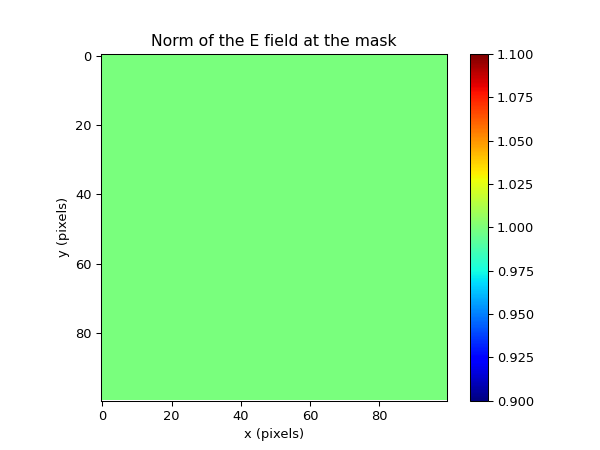

<IPython.core.display.Javascript object>


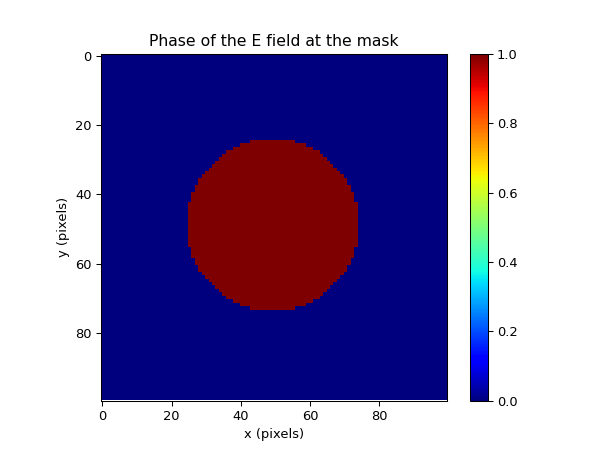

Text(0, 0.5, 'y (pixels)')

In [2]:
#make circular apertures (returns also the 2D array)

npix = 100
lda = 400e-9 #m
zdist = 300*lda #m

rd = 1000e-9 #m 
E0=1 
 
pixsize = 0.1 * lda
 
xsiz = npix*pixsize
ysiz = npix*pixsize

partial = rd/(pixsize * npix)

mask = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# Create circular aperture on mask

center = (-xsiz/npix/2, -ysiz/npix/2) 
mask = moe.generate.circular_aperture(mask, radius=partial*xsiz, center=center )

moe.plotting.plot_aperture(mask)
moe.plotting.plot_aperture(mask)


fmask = mask.aperture
Em = E0 * np.exp(1.0j*fmask)

##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [3]:
####Propagate field and calculate in plane YZ, using npix bins in Y
zmin = lda 
zmax = 0.2*zdist
nzs = 200
xplus = xsiz/2
xminus = -xplus  

RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, npix, xplus, xplus, lda,1,verbose=True)
field = RS_results[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:00:45.288851


<IPython.core.display.Javascript object>


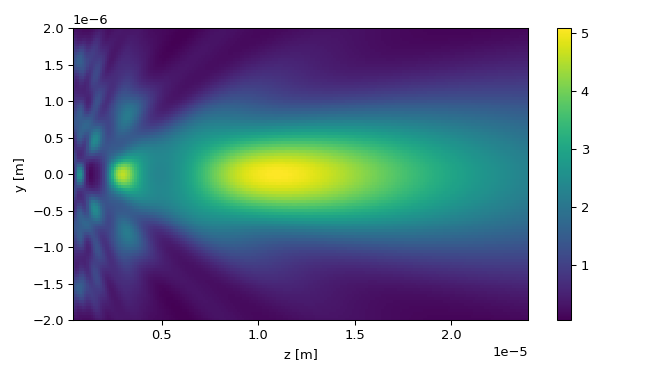

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [4]:
##Plot the YZ propagation 
fig = plt.figure(figsize=(7,4)) 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(xminus,xplus,npix)
z = field

plt.pcolormesh(zp,yp,np.abs(z)**2)
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.tight_layout()

## RS propagation from a Fresnel multilevel mask example #1

<IPython.core.display.Javascript object>


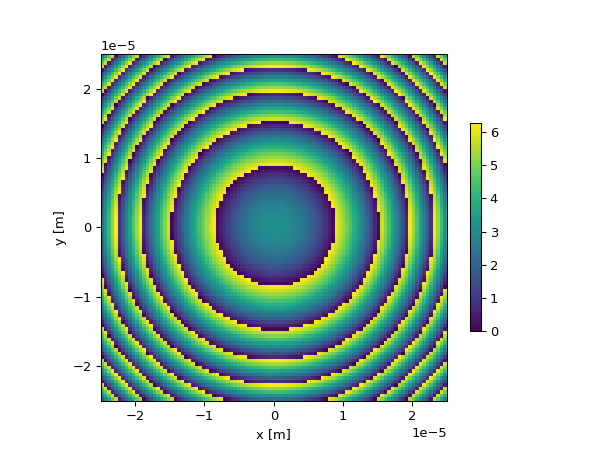

<IPython.core.display.Javascript object>


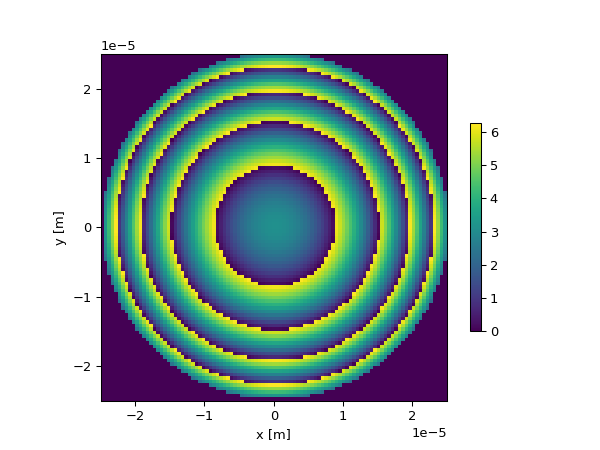

<IPython.core.display.Javascript object>


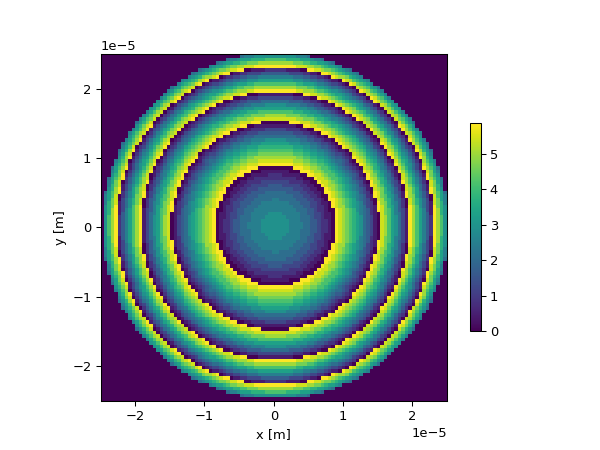

<IPython.core.display.Javascript object>


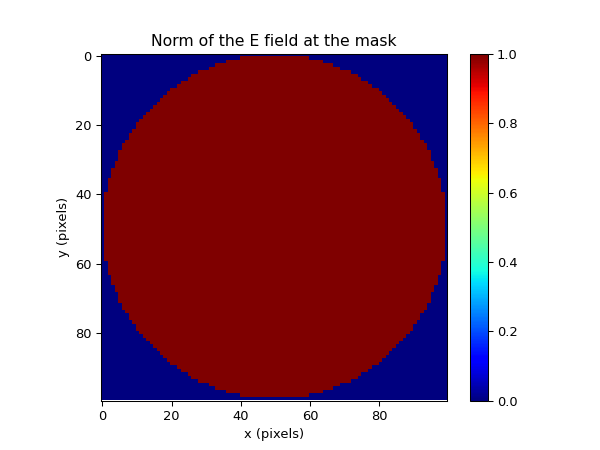

<IPython.core.display.Javascript object>


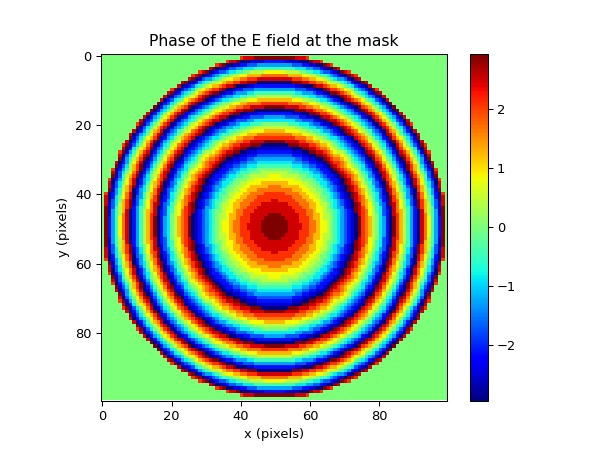

Text(0, 0.5, 'y (pixels)')

In [5]:
#number of pixels 
npix = 100

#size of the rectangular mask 
xsiz = 50e-6 #xsize in m 
ysiz = 50e-6
pixsize = 1e-6 #m
lda = 500e-9 #m
foc = 150e-6
zmin = lda
zmax = 1.2* foc 
nzs= npix*8+1

E0 = 1 #incoming field amplitude, arbitrary value 

#half screen size 
xminus = -xsiz/2 
xplus = xsiz/2 

#Select exact position of contours  in phase
phas_vals = np.linspace(0, 2*np.pi, 16)

###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc, lda )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc, lda, radius=xsiz/2)
moe.plotting.plot_aperture(mask2, )

#discretize mask in number of levels
mask2.discretize(np.array( phas_vals)[:] ) 
moe.plotting.plot_aperture(mask2)

############
##define the electric field at mask  
fmask = mask2.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask2.XX**2+mask2.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")


In [6]:
##Propagate field and calculate in plane XY 
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, npix, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] #E field 

Progress: [####################] 100.0%
Elapsed: 0:00:20.919241


<IPython.core.display.Javascript object>


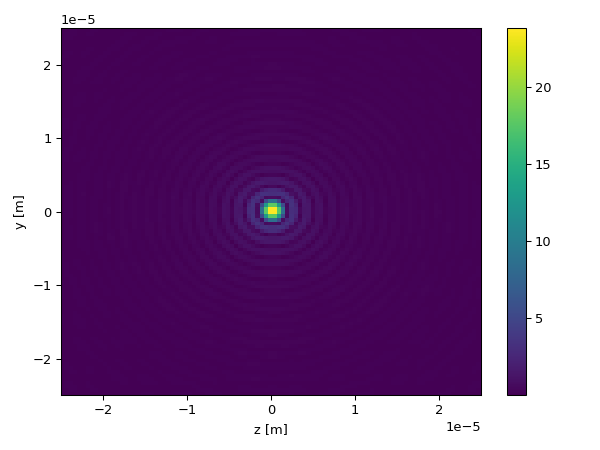

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [7]:
fig = plt.figure() 

xp = np.linspace(xminus,xplus,npix)
yp = xp

plt.pcolormesh(xp,yp,np.abs(z1) )

plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.tight_layout()
plt.colorbar()
plt.savefig("FresnelN16-XY.png")

In [8]:
####Propagate field and calculate in plane YZ, using 100 bins in Y
nxcuts = 100
RS_resultsyz = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, nxcuts, xplus, xplus, lda,1, verbose=True)
field2 = RS_resultsyz[0] #E field 

Progress: [####################] 100.0%
Elapsed: 0:03:02.879653


<IPython.core.display.Javascript object>


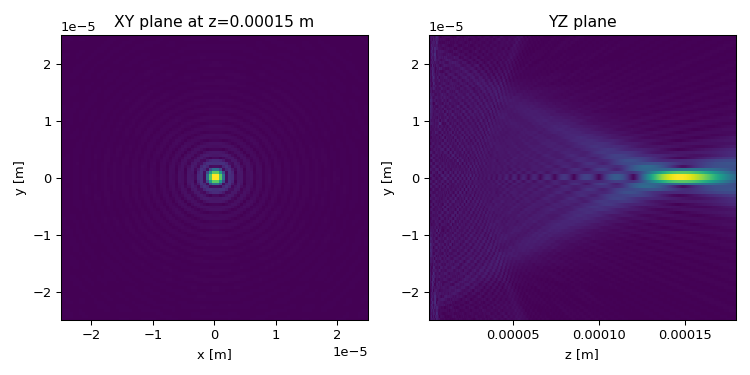

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()
C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [9]:
###Plot the two fields in same panel 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])

z2 = RS_resultsyz[0]
xp2 = np.linspace(xminus,xplus,z2.shape[0])
zp2 = np.linspace(zmin,zmax,z2.shape[1])

ax1.title.set_text('XY plane at z='+str(foc)+' m')
ax1.pcolormesh(xp1,yp1,np.abs(z1) )
ax2.title.set_text('YZ plane')
ax2.pcolormesh(zp2,xp2,np.abs(z2) )


ax1.set(xlabel="x [m]", ylabel="y [m]")
ax2.set(xlabel="z [m]", ylabel="y [m]")

plt.tight_layout()

In [10]:
##Propagate field using RS integral using smaller bins 
#-> Results in a faster calculation just for fast inspection, however, use with care, due to possible bluring effects
nxcuts = 25

##Propagate field and calculate in plane XY 
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, nxcuts, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] #E field 


RS_resultsyz = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, nxcuts, xplus, xplus, lda,1, verbose=True)
field2 = RS_resultsyz[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:00:01.520889
Progress: [####################] 100.0%
Elapsed: 0:00:47.538829


<IPython.core.display.Javascript object>


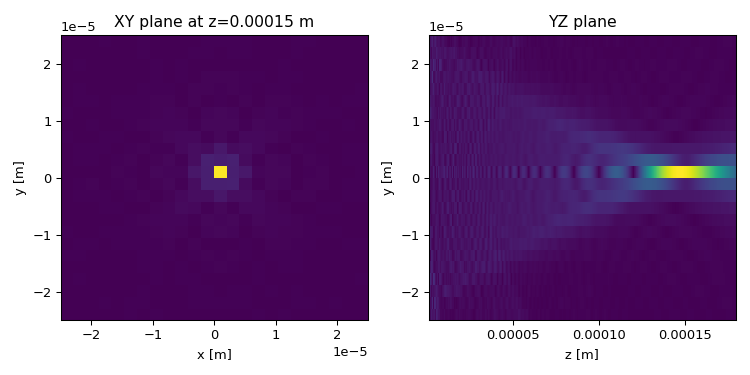

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()
C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [11]:
###Plot the two fields in same panel 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])

z2 = RS_resultsyz[0]
xp2 = np.linspace(xminus,xplus,z2.shape[0])
zp2 = np.linspace(zmin,zmax,z2.shape[1])

ax1.title.set_text('XY plane at z='+str(foc)+' m')
ax1.pcolormesh(xp1,yp1,np.abs(z1) )
ax2.title.set_text('YZ plane')
ax2.pcolormesh(zp2,xp2,np.abs(z2) )


ax1.set(xlabel="x [m]", ylabel="y [m]")
ax2.set(xlabel="z [m]", ylabel="y [m]")

plt.tight_layout()

## RS propagation from a Fresnel multilevel mask example #2

<IPython.core.display.Javascript object>


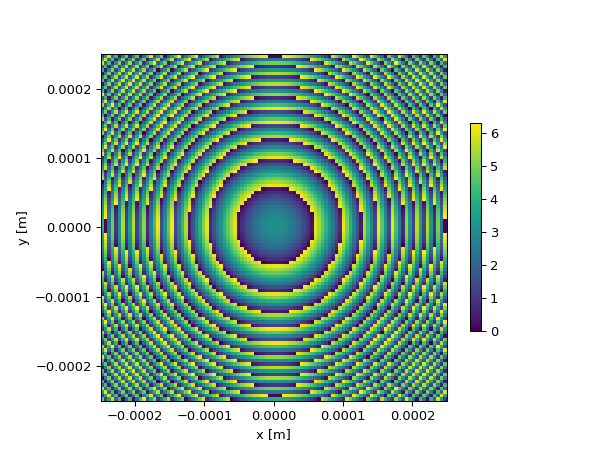

<IPython.core.display.Javascript object>


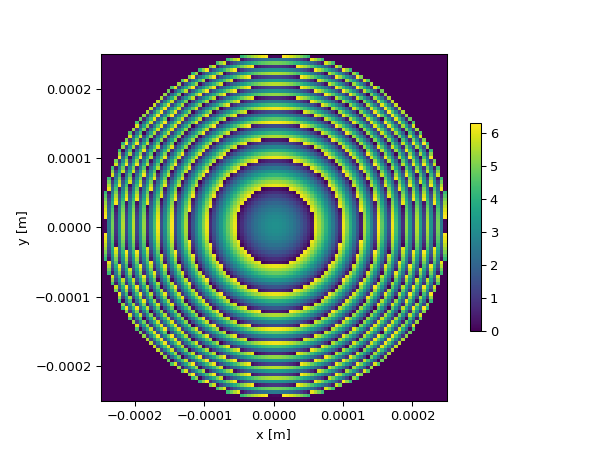

<IPython.core.display.Javascript object>


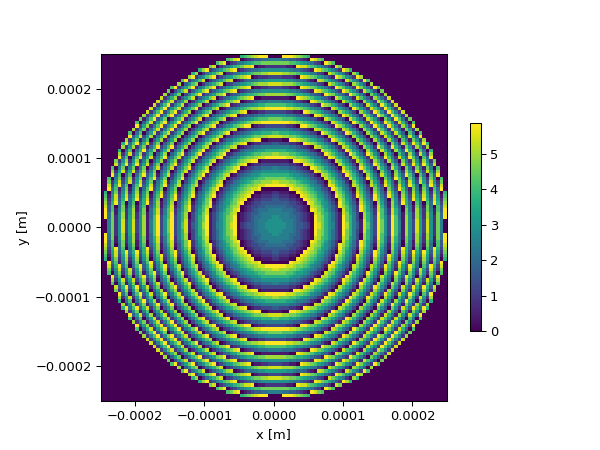

<IPython.core.display.Javascript object>


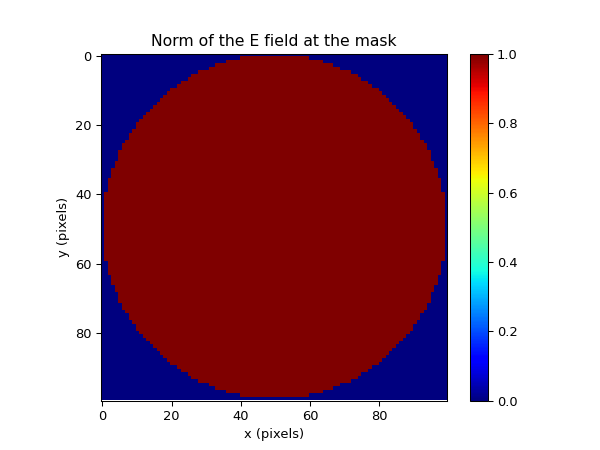

<IPython.core.display.Javascript object>


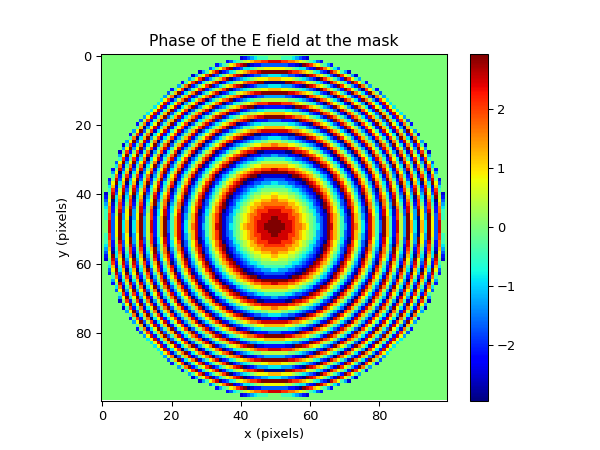

Text(0, 0.5, 'y (pixels)')

In [12]:
#number of pixels 
npix = 100

#size of the rectangular mask 
xsiz = 500e-6 #xsize in m 
ysiz = 500e-6
pixsize =  xsiz/npix #m
lda = 632.8e-9 #m
foc = 5000e-6
zmin = lda
zmax = 1.2* foc 
nzs= npix*8+1

E0 = 1 #incoming field amplitude, arbitrary value 

#half screen size 
xminus = -xsiz/2 
xplus = xsiz/2 

#Select exact position of contours  in phase
phas_vals = np.linspace(0, 2*np.pi, 16)

###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc, lda )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc, lda, radius=xsiz/2)
moe.plotting.plot_aperture(mask2, )

#discretize mask in number of levels
mask2.discretize(np.array( phas_vals)[:] ) 
moe.plotting.plot_aperture(mask2)

############
##define the electric field at mask  
fmask = mask2.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask2.XX**2+mask2.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [13]:
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, npix*4, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] ##E field

nxcuts = npix
RS_resultsyz = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, nxcuts, xplus, xplus, lda,1, verbose=True)
field2 = RS_resultsyz[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:05:45.730686
Progress: [####################] 100.0%
Elapsed: 0:03:12.543377


<IPython.core.display.Javascript object>


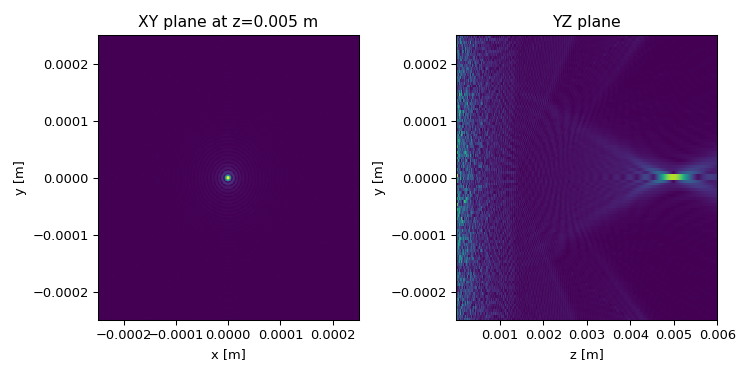

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


In [14]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])

z2 = RS_resultsyz[0]
xp2 = np.linspace(xminus,xplus,z2.shape[0])
zp2 = np.linspace(zmin,zmax,z2.shape[1])

ax1.title.set_text('XY plane at z='+str(foc)+' m')
ax1.pcolormesh(xp1,yp1,np.abs(z1) )
ax2.title.set_text('YZ plane')
ax2.pcolormesh(zp2,xp2,np.abs(z2) )


ax1.set(xlabel="x [m]", ylabel="y [m]")
ax2.set(xlabel="z [m]", ylabel="y [m]")

plt.tight_layout()

<IPython.core.display.Javascript object>


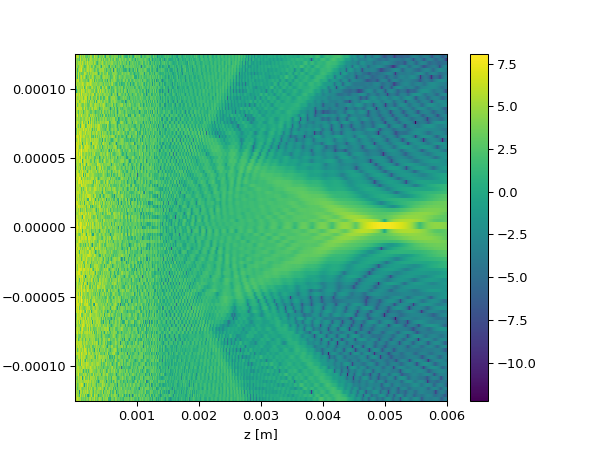

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


In [16]:
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(-xplus/2,xplus/2,npix)
z = RS_results[0]

plt.pcolormesh(zp,yp,np.log(np.abs(z2)**2) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.savefig("Zoom-YZ-log-representation.png")

## RS propagation from a Fresnel Zone Plate

../..\pyMOE\plotting.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


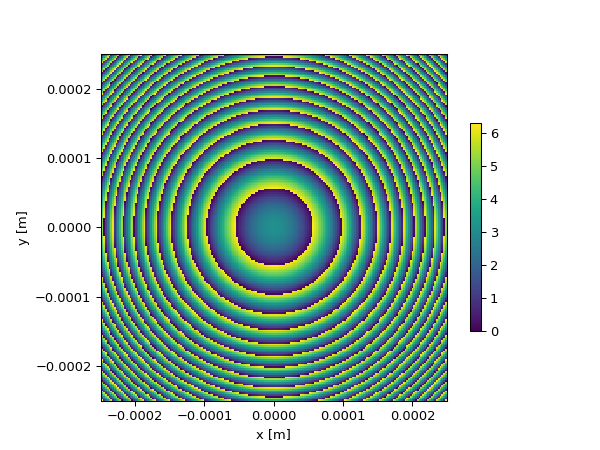

<IPython.core.display.Javascript object>


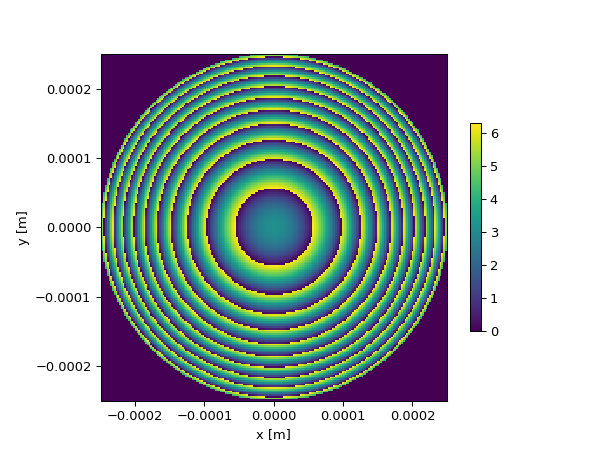

<IPython.core.display.Javascript object>


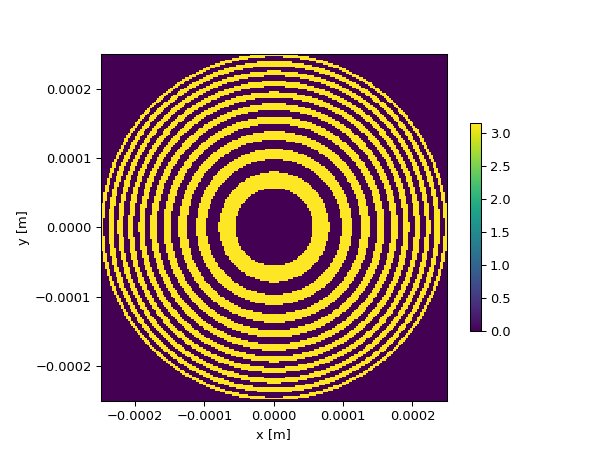

<IPython.core.display.Javascript object>


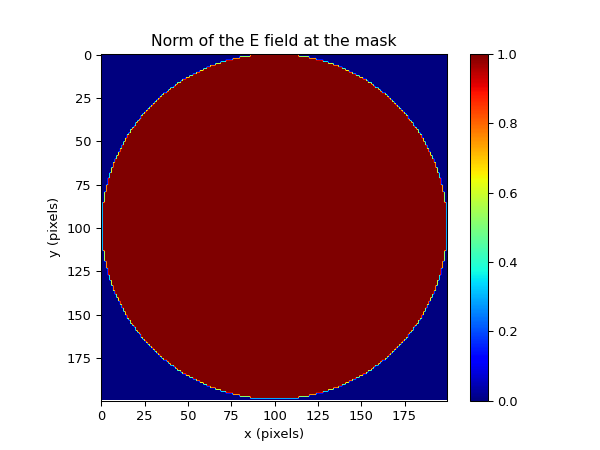

<IPython.core.display.Javascript object>


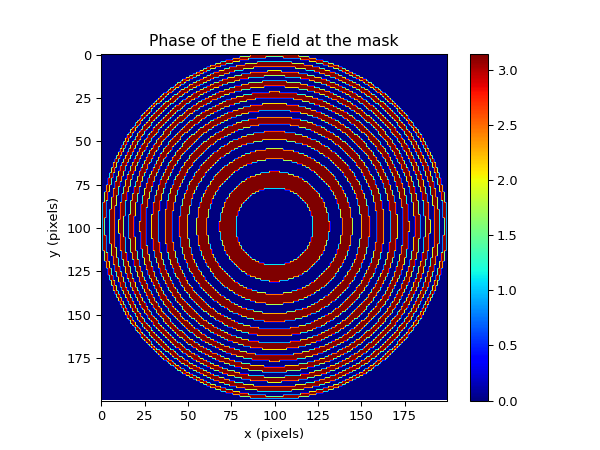

Text(0, 0.5, 'y (pixels)')

In [17]:
####generate a fresnel zone plate 
#number of pixels 
npix = 200

#size of the rectangular mask 
xsiz = 500e-6 #xsize in m 
ysiz = 500e-6
pixsize =  xsiz/npix #m
lda = 632.8e-9 #m
foc = 5000e-6
zmin = lda
zmax = 1.2* foc 
nzs= 256

E0 = 1 #incoming field amplitude, arbitrary value 

#half screen size 
xminus = -xsiz/2 
xplus = xsiz/2 

#Select exact position of contours  in phase
phas_vals = [ 0, np.pi]

###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc, lda )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc, lda, radius=xsiz/2)
moe.plotting.plot_aperture(mask2, )

#discretize mask in number of levels
mask2.discretize(np.array( phas_vals)[:] ) 
moe.plotting.plot_aperture(mask2)

############
##define the electric field at mask  
fmask = mask2.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask2.XX**2+mask2.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [20]:
##Propagate field using RS integal 
RS_results2 = moe.propagate.RS_intZZ(zmin,zmax,nzs,0,0, Em, npix, pixsize, npix, xplus, xplus, lda,1, verbose=True)
field2 = RS_results2[2] ##Intensity log 


Progress: [####################] 100.0%
Elapsed: 0:00:02.616245


<IPython.core.display.Javascript object>


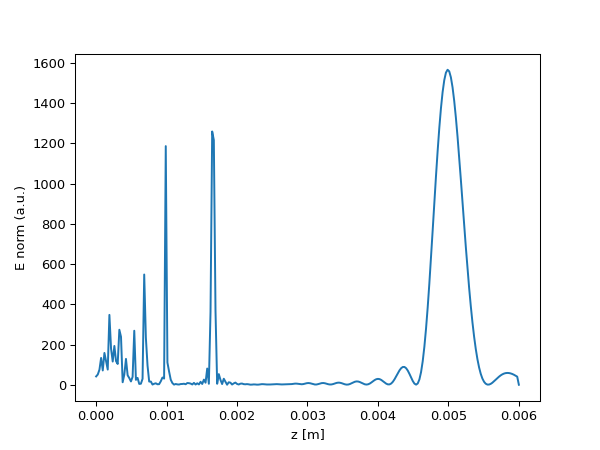

In [21]:
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
ef = RS_results2[1]

plt.plot(zp,ef)
plt.xlabel("z [m]")
plt.ylabel("E norm (a.u.)")

plt.savefig("FZP-Zprop.png")


In [22]:
####Propagate field and calculate in plane YZ, using npix bins in Y
RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, npix, xplus, xplus, lda,1,verbose=True)
field = RS_results[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:07:10.779390


<IPython.core.display.Javascript object>


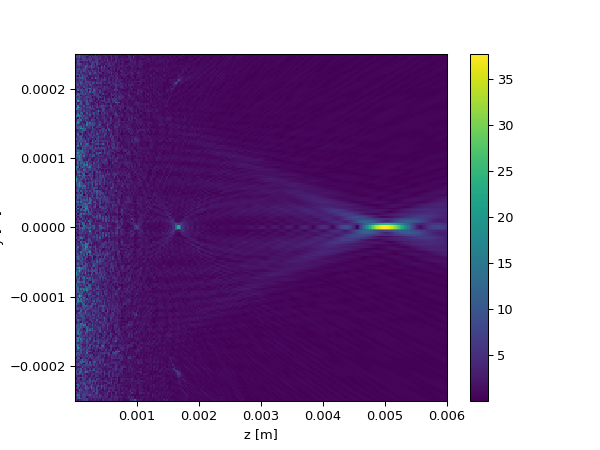

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [23]:
##Plot the YZ propagation 
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(xminus,xplus,npix)
z = field

plt.pcolormesh(zp,yp,np.abs(z) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.savefig("FresnelN2-YZ.png")

## RS propagation from a Spiral Phase Plate

<IPython.core.display.Javascript object>


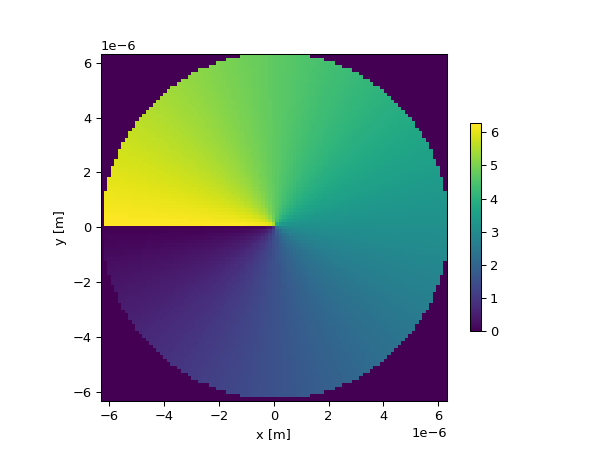

../..\pyMOE\plotting.py:53: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(aperture.x/scale_factor, aperture.y/scale_factor, aperture.aperture,)


<IPython.core.display.Javascript object>


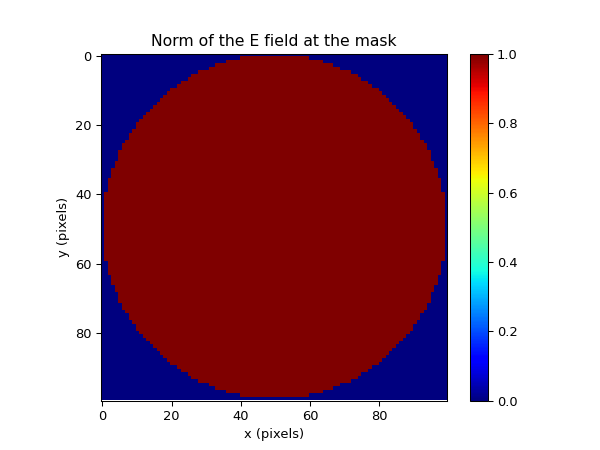

<IPython.core.display.Javascript object>


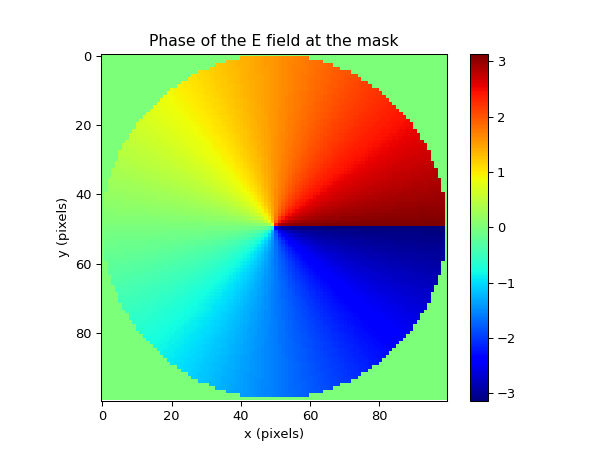

Text(0, 0.5, 'y (pixels)')

In [24]:
####Spiral Phase plate 

####generate a fresnel zone plate 
npix =100 # nr of pixels 
lda = 632.8e-9 #wavelength in m 
foc = 100*lda # focal distance in m
xsiz = 20*lda  #x-size in m 
ysiz = 20*lda #y-size in m
pixsize = xsiz/npix

xplus=xsiz/2
xminus = -xplus 

ltop = 1 #topological number

#spiral mask is defined as  
#spiral(x,y,x0,y0,ltop)
    
def spiral(x,y,x0,y0,L):
    """
    returns a spiral COMPLEX PHASE with input meshgrid (x,y) with center at (x0,y0)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center of the lens 
    y0 = y-coordinate of center of the lens
    L = topological charge 
    """

    theta = np.arctan2((y-y0),(x-x0))
    sp = np.exp(1.0j*L*theta)
    return sp
    

n =10 # number of gray levels 

center = (0, 0)

aperture = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=ltop)
mask.aperture = mask.aperture + np.pi 

mask.aperture[np.where(mask.XX**2+mask.YY**2>(xsiz/2)**2 ) ] =0 
moe.plotting.plot_aperture(mask)

fmask = mask.aperture

Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask.XX**2+mask.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [25]:
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, npix, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] ##E field

Progress: [####################] 100.0%
Elapsed: 0:00:23.847501


<IPython.core.display.Javascript object>


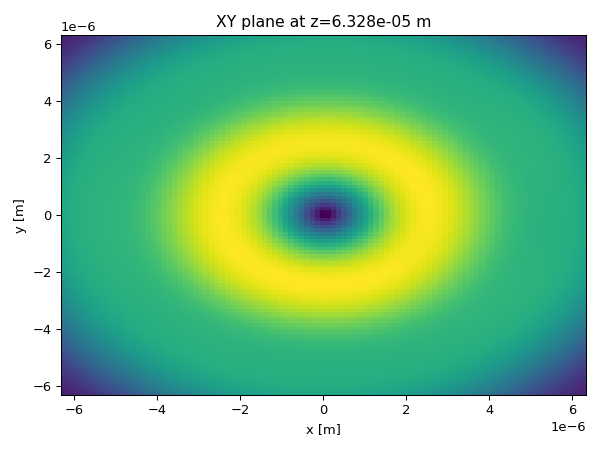

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [26]:
fig = plt.figure()

z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])


plt.pcolormesh(xp1,yp1,np.abs(z1) )
plt.title('XY plane at z='+str(foc)+' m')

plt.xlabel("x [m]")
plt.ylabel("y [m]")

plt.tight_layout()

In [27]:
####Propagate field and calculate in plane YZ, using npix bins in Y
zmin = lda
zmax = 2*foc
nzs=500
RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, npix, xplus, xplus, lda,1,verbose=True)
field = RS_results[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:01:47.822592


<IPython.core.display.Javascript object>


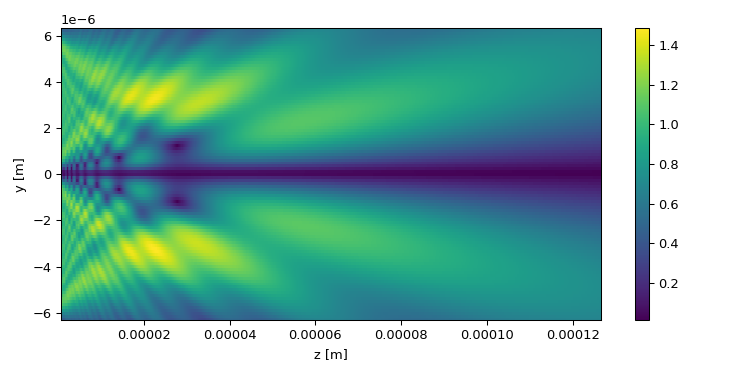

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [28]:
##Plot the YZ propagation 
fig = plt.figure(figsize=(8,4)) 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(xminus,xplus,npix)
z = field

plt.pcolormesh(zp,yp,np.abs(z) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.tight_layout()

plt.savefig("Spiral-YZ.png")